In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from g_over_t import add_elapsed_time_column
import math

# FILTERED_COMBINED_DATA_PATH = R"april21govert\combined_filtered_SBand_March.csv"
FILTERED_COMBINED_DATA_PATH = R"april21govert\combined_filtered_XBand_April.csv"
data=pd.read_csv(FILTERED_COMBINED_DATA_PATH)
data=add_elapsed_time_column(data)
data

,timestamp_posix,timestamp,power,azimuth,elevation,elapsed
0,1.713746e+09,2024-04-22T00:27:51.127829+00:00,-60.21,139.995,89.756,0.000000
1,1.713746e+09,2024-04-22T00:27:51.274602+00:00,-60.21,139.995,89.756,0.146773
2,1.713746e+09,2024-04-22T00:27:51.420195+00:00,-60.21,139.995,89.756,0.292366
3,1.713746e+09,2024-04-22T00:27:51.559281+00:00,-60.21,139.995,89.756,0.431452
4,1.713746e+09,2024-04-22T00:27:51.705257+00:00,-60.21,139.995,89.756,0.577428
...,...,...,...,...,...,...
27969,1.713750e+09,2024-04-22T01:35:29.980162+00:00,-60.27,119.272,90.000,4058.852333
27970,1.713750e+09,2024-04-22T01:35:30.127946+00:00,-60.27,119.272,90.000,4059.000117
27971,1.713750e+09,2024-04-22T01:35:30.272579+00:00,-60.26,119.272,90.000,4059.144750
27972,1.713750e+09,2024-04-22T01:35:30.416304+00:00,-60.26,119.272,90.000,4059.288475


In [71]:
def isvert(
       data:pd.DataFrame,
       index1:int,
       index2:int,
       angle_threshold_degrees=1.0
) -> bool:
    """determines if two points are vertical. Points that do not move are considered in this case to be vertical

    Args:
        data (pd.DataFrame): _description_
        index1 (int): _description_
        index2 (int): _description_
        angle_threshold_degrees (float, optional): _description_. Defaults to 1.0.

    Returns:
        bool: _description_
    """
    row1=data.iloc[index1]
    row2=data.iloc[index2]

    elevation1=row1[f"elevation"]
    elevation2=row2[f"elevation"]
    azimuth1=row1[f"azimuth"]
    azimuth2=row2[f"azimuth"]

    # print(f"{azimuth1=}")
    # print(f"{azimuth2=}")
    # print(f"{elevation1=}")
    # print(f"{elevation2=}")

    rise = elevation2 - elevation1
    run = azimuth2 - azimuth1
    if abs(rise)<(1e-9) and abs(run)<(1e-9):
        return True
    # print(f"{rise=}")
    # print(f"{run=}")

    angle_degrees=abs(math.degrees(math.atan2(rise,run)))

    # print(f"{angle_degrees=}")
    if (90-angle_threshold_degrees)<=angle_degrees<=(90+angle_threshold_degrees):
        return True
    else:
        return False
    
    
x=isvert(data,2,3)
print(x)


True


In [72]:
def find_vertical_segments(
        data:pd.DataFrame
):
    segments = []
    for index in range(len(data)-1):
        if isvert(data,index,index+1):
            # print(f"{index=}")
            segments.append(index)
    return segments

In [73]:
indexes=find_vertical_segments(data)
print(indexes)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 329, 330, 331, 332, 333, 334, 335, 336, 337

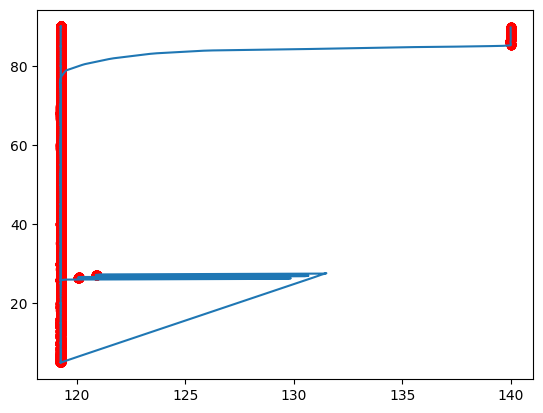

In [74]:
plt.plot(data["azimuth"],data["elevation"])
segment_data=data.iloc[indexes]
plt.scatter(segment_data["azimuth"],segment_data["elevation"],color="red")

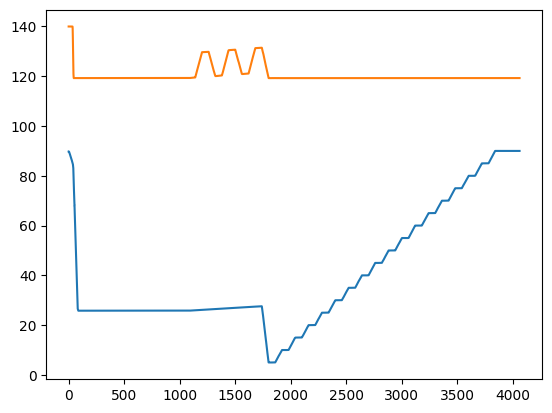

In [76]:
plt.plot(data["elapsed"],data["elevation"])
plt.plot(data["elapsed"],data["azimuth"])